# ```Problem Statement :-```

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -

1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

# ```Business Goal:-```

 We have to work on a project where we collect data of flight fares with other features and 
work to make a model to predict fares of flights.

# ```Technical Requirements:-```

* Data contains 3262 entries each having 10 variables.
* Extensive EDA has to be performed to gain relationships of important variable and price.
* Data contains numerical as well as categorical variable. We need to handle them accordingly.
* We have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
* We need to find important features which affect the price positively or negatively.

# ```Import necessary libraries```

In [1626]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time


#import plotty
import warnings
warnings.filterwarnings('ignore')

# ```Reading the CSV Files```

In [1722]:
df = pd.read_csv("C://Users//hp-pc//Desktop//Internship22//Flight price prediction//scrape_code_flight_price_prediction.csv")
df.head()

,Unnamed: 0,Airline_Name,Date-of_Journey,Source,Destination,Duration,Total_Stop,Departure_Time,Arrival_Time,Price
0,0,IndiGo,"Mon, Mar 28",Mumbai,New Delhi,02 h 05 m,Non stop,14:10,12:05,7308
1,1,Go First,"Mon, Mar 28",Mumbai,New Delhi,02 h 10 m,Non stop,14:20,12:10,7308
2,2,Air India,"Mon, Mar 28",Mumbai,New Delhi,02 h 15 m,Non stop,15:15,13:00,7308
3,3,IndiGo,"Mon, Mar 28",Mumbai,New Delhi,02 h 10 m,Non stop,16:35,14:25,7308
4,4,Go First,"Mon, Mar 28",Mumbai,New Delhi,02 h 05 m,Non stop,16:40,14:35,7308


# ```Data Understanding``` 

In [1628]:
#check the shape of the column
df.shape

(3262, 10)

In [1629]:
#check the type of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3262 non-null   int64 
 1   Airline_Name     3262 non-null   object
 2   Date-of_Journey  3262 non-null   object
 3   Source           3262 non-null   object
 4   Destination      3262 non-null   object
 5   Duration         3262 non-null   object
 6   Total_Stop       3262 non-null   object
 7   Departure_Time   3262 non-null   object
 8   Arrival_Time     3262 non-null   object
 9   Price            3262 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 255.0+ KB


In [1630]:
#check the number of columns 
df.columns

Index(['Unnamed: 0', 'Airline_Name', 'Date-of_Journey', 'Source',
       'Destination', 'Duration', 'Total_Stop', 'Departure_Time',
       'Arrival_Time', 'Price'],
      dtype='object')

In [1631]:
#drop the unncessary column first
df.drop(columns="Unnamed: 0",inplace = True)

In [1632]:
#check the duplicate value
df.duplicated().sum()

0

In [1633]:
#check the zero values
df.all()

Airline_Name       True
Date-of_Journey    True
Source             True
Destination        True
Duration           True
Total_Stop         True
Departure_Time     True
Arrival_Time       True
Price              True
dtype: bool

In [1634]:
#check the null values
df.isnull().sum()

Airline_Name       0
Date-of_Journey    0
Source             0
Destination        0
Duration           0
Total_Stop         0
Departure_Time     0
Arrival_Time       0
Price              0
dtype: int64

In [1635]:
#Check the numerical columns and Categorical columns.
def all_columns(i):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    print("All numeric columns are:- \n \n {0}".format(num_cols))
    print()
    print("Number of Numerical columns are:- {0}".format(len(num_cols)))
    
    cat_cols = list(set(cols)- set(num_cols))
    print()
    print("All Categorical Columns are:- \n \n {0}".format(cat_cols))
    print()
    print("Number of Categorical columns are:- {0}".format(len(cat_cols)))
    
i = df.columns    
all_columns(i)

All numeric columns are:- 
 
 Index(['Price'], dtype='object')

Number of Numerical columns are:- 1

All Categorical Columns are:- 
 
 ['Total_Stop', 'Destination', 'Arrival_Time', 'Departure_Time', 'Duration', 'Airline_Name', 'Source', 'Date-of_Journey']

Number of Categorical columns are:- 8


# ```Documentation:-```

* The shape of this dataset is 3262 rows and 10 columns
* Only one column ```Price``` is numerical else all columns are categorical.
* There is no duplicate values are found
* There are no null values are found
* There are no zero va;ues are found
* We need to split some columns into two or three parts for example ```Date-of_Journey```, ```Duration```, ```Departure_Time```, ```Arrival_Time```

```Check the unique values of the columns```

In [1637]:
#check the unique value of the column 'Airline_name'
df["Airline_Name"].unique()

array(['IndiGo', 'Go First', 'Air India', 'SpiceJet', 'AirAsia',
       'Vistara', 'IndiGo, Star Air'], dtype=object)

In [1638]:
#check the unique value of the column 'Source'
df["Source"].unique()

array(['Mumbai', 'Goa', 'Ahmedabad', 'Kolkata', 'New Delhi'], dtype=object)

In [1639]:
#check the unique value of the column 'Destination'
df["Destination"].unique()

array(['New Delhi', 'Mumbai', 'Hyderabad', 'Bengaluru', 'Chennai'],
      dtype=object)

```Check the count of unique values```

In [1640]:
df["Airline_Name"].value_counts()

IndiGo              1223
Vistara              599
Go First             510
Air India            418
AirAsia              272
SpiceJet             239
IndiGo, Star Air       1
Name: Airline_Name, dtype: int64

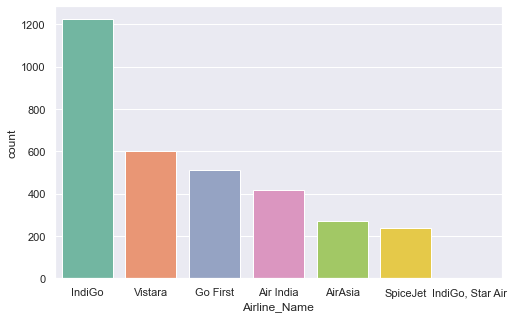

In [1641]:
#plotting each class frequency
fig = plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Airline_Name",palette="Set2", data=df, order = df["Airline_Name"].value_counts().index)
plt.show()

In [1642]:
df["Source"].value_counts()

Mumbai       1508
New Delhi     717
Goa           426
Ahmedabad     355
Kolkata       256
Name: Source, dtype: int64

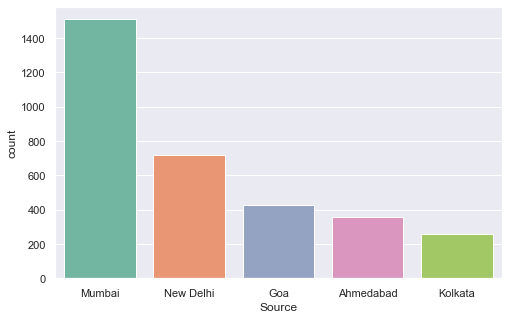

In [1643]:
#plotting each class frequency
fig = plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Source",palette="Set2", data=df, order = df["Source"].value_counts().index)
plt.show()

In [1644]:
df["Destination"].value_counts()

New Delhi    1461
Bengaluru     717
Mumbai        426
Chennai       402
Hyderabad     256
Name: Destination, dtype: int64

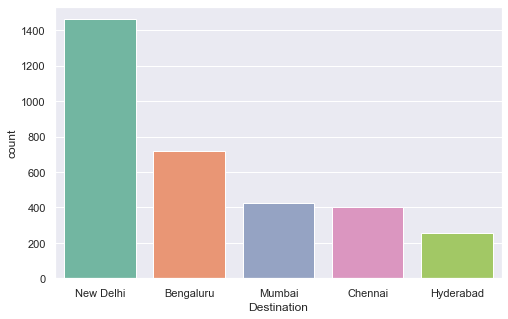

In [1645]:
#plotting each class frequency
fig = plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Destination",palette="Set2", data=df, order = df["Destination"].value_counts().index)
plt.show()

We see here, ```IndiGo``` flights are more then any other flights, there is only one ```IndiGo, Star Air```, As we observe the count plots, flights in ```Mumbai``` is more then others as a ```Source```. On the other hand, ```Delhi``` is more then others as a destination of flights.

# ```Data Cleaning```

In [1651]:
#rename the columns
df.rename(columns={'Date-of_Journey': 'Date_of_Journey'}, inplace = True)

In [1653]:
#check the unique value of the column
df["Date_of_Journey"].unique()

array(['Mon, Mar 28', 'Tue, Mar 29', 'Wed, Mar 30', 'Thu, Mar 31',
       'Fri, Apr 1', 'Sat, Apr 2', 'Sun, Apr 3', 'Mon, Apr 4',
       'Tue, Apr 5', 'Wed, Apr 6', 'Thu, Apr 7', 'Fri, Apr 8',
       'Sat, Apr 9', 'Sun, Apr 10', 'Mon, Apr 11', 'Sat, Apr 16',
       'Sun, Apr 17', 'Mon, Apr 18', 'Tue, Apr 19'], dtype=object)

In [ ]:
#split this colum into three columns and split the details and make it clean

In [1654]:
df["Day_of_Journey"] = df["Date_of_Journey"].str.split(" ").str.slice(0,1).str.join('').str.replace(',','')

In [1655]:
df["Month_of_Journey"] = df["Date_of_Journey"].str.split(" ").str.slice(1,2).str.join('').str.replace(',','')

In [1656]:
df["Date_of_Journey"] = df["Date_of_Journey"].str.split(" ").str.slice(2,).str.join('').str.replace(',','')

We split this column ```Date_of_Journey``` into three parts, We save  days into ```Day_of_Journey``` and  months into ```Month_of_Journey```  and date into the same column ```Date_of_Journey```

In [ ]:
#split this colum into two columns and split the details and make it clean

In [1657]:
df['Departure_Time'].str.split(':')
time.sleep(2)
df['Departure_Time_hours'] = df['Departure_Time'].str[0:2]
time.sleep(2)
df['Departure_Time_mins'] = df['Departure_Time'].str[3:]

In [1658]:
df['Arrival_Time'].str.split(':')
time.sleep(2)
df['Arrival_Time_hours'] = df['Arrival_Time'].str[0:2]
time.sleep(2)
df['Arrival_Time_mins'] = df['Arrival_Time'].str[3:]

In [1659]:
df['Duration'].str.split(' ')
time.sleep(2)
df['Duration_hours'] = df['Duration'].str[0:2]
time.sleep(2)
df['Duration_mins'] = df['Duration'].str[5:7]

In [1660]:
df['Total_Stop'].str.split(' ').str[0:2].str.join(' ')

0       Non stop
1       Non stop
2       Non stop
3       Non stop
4       Non stop
          ...   
3257    Non stop
3258      1 stop
3259    Non stop
3260    Non stop
3261      1 stop
Name: Total_Stop, Length: 3262, dtype: object

In [1661]:
df['Route'] = df['Total_Stop'].str.split(' ').str[3:].str.join(' ')

In [1662]:
df['Total_Stop'] = df['Total_Stop'].str.split(' ').str[0:2].str.join(' ')

In [1664]:
df['Route'].unique()

array(['', 'Lucknow', 'Ahmedabad', 'Indore', 'Bhopal', 'Jaipur',
       'Dehradun', 'Jodhpur', 'Aurangabad', 'Udaipur', 'Bengaluru',
       'Ranchi', 'Vadodara', 'Jabalpur', 'Hyderabad,Bengaluru',
       'New Delhi', 'Mumbai', 'Kolkata', 'Goa', 'Mumbai,Bhopal',
       'Chandigarh,Srinagar', 'Visakhapatnam', 'Raipur', 'Chennai',
       'Bhubaneswar,Bengaluru', 'New Delhi,Mumbai', 'Patna',
       'Bhubaneswar', 'Hyderabad', 'Pune', 'Nagpur', 'Guwahati', 'Shirdi',
       'Kochi'], dtype=object)

In [1665]:
df['Route'].value_counts()

                         2881
Bengaluru                  62
Mumbai                     34
Jaipur                     33
New Delhi                  32
Chennai                    26
Indore                     22
Nagpur                     22
Ahmedabad                  21
Bhopal                     20
Hyderabad                  19
Goa                        12
Kolkata                     9
Ranchi                      9
Aurangabad                  7
Lucknow                     7
Jodhpur                     7
Bhubaneswar                 5
Visakhapatnam               5
Pune                        4
Raipur                      4
Hyderabad,Bengaluru         3
Vadodara                    3
Udaipur                     3
Patna                       2
Guwahati                    2
Chandigarh,Srinagar         1
New Delhi,Mumbai            1
Mumbai,Bhopal               1
Kochi                       1
Dehradun                    1
Jabalpur                    1
Shirdi                      1
Bhubaneswa

We split ```Departure_Time``` into two parts hours into this column ```Departure_Time_hours``` and minutes into ```Departure_Time_mins``` . Similarly, We split ```Arrival_Time``` into two parts hours into this column ```Arrival_Time_hours``` and minutes into ```Arrival_Time_mins``` and We split ```Duration``` into two parts hours into this column ```Duration_hours``` and minutes into ```Duration_mins```. We split ```Total_Stop``` into parts, first column ```Total_Stop``` contains how many stops and ```Route``` column contains route of the flight. Perhaps ```Route``` Column contains lot of null values. 

# ```Data Analysis```

```Q1- Do airfares change frequently?```

```Q2- Do they move in small increments or in large jumps?```

```Q3- Do they tend to go up or down over time?```

```Q4- What is the best time to buy so that the consumer can save the most by taking the least risk?```

```Q5- Does price increase as we get near to departure date?```

```Q6- Is Indigo cheaper than Other Flights?```

```Q7 - Are morning flights expensive?```

Text(0, 0.5, 'Price')

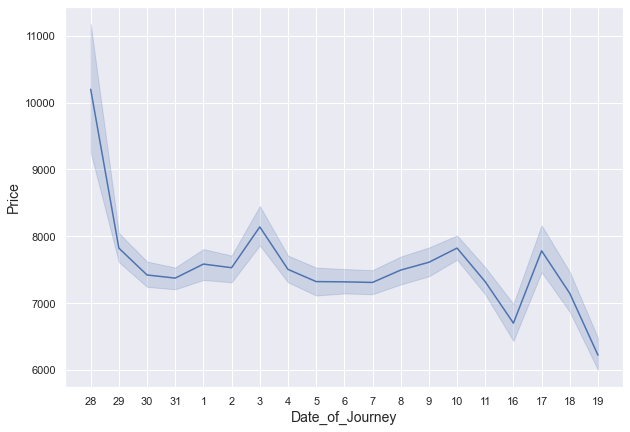

In [1667]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'Date_of_Journey',y= 'Price', data=df)
plt.xlabel('Date_of_Journey', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Text(0, 0.5, 'Price')

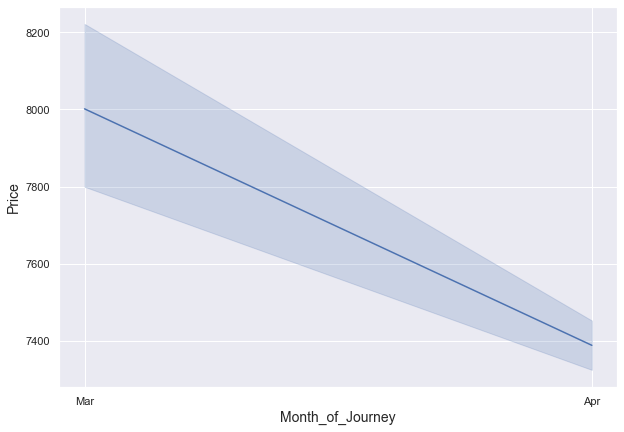

In [1668]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'Month_of_Journey',y= 'Price', data=df)
plt.xlabel('Month_of_Journey', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Text(0, 0.5, 'Price')

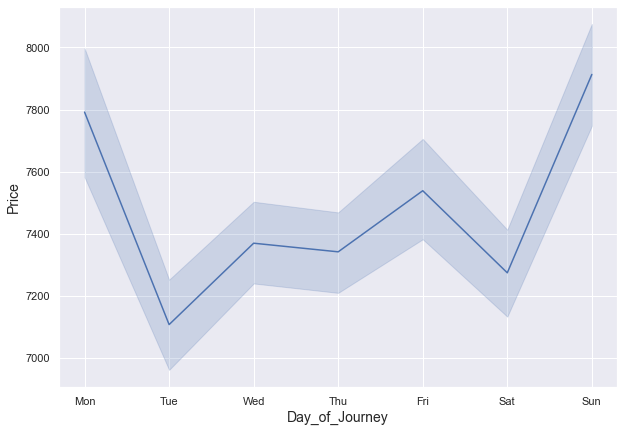

In [1669]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'Day_of_Journey',y= 'Price', data=df)
plt.xlabel('Day_of_Journey', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Text(0, 0.5, 'Price')

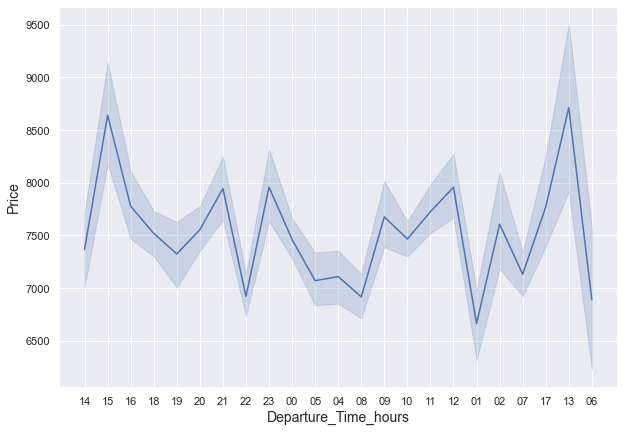

In [1670]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'Departure_Time_hours',y= 'Price', data=df)
plt.xlabel('Departure_Time_hours', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Text(0, 0.5, 'Price')

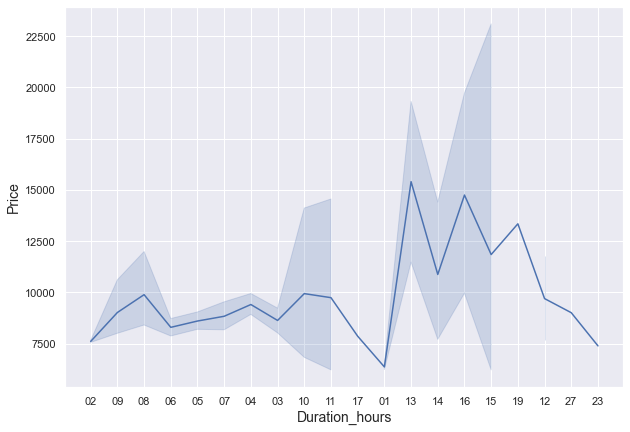

In [1671]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'Duration_hours',y= 'Price', data=df)
plt.xlabel('Duration_hours', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Text(0, 0.5, 'Price')

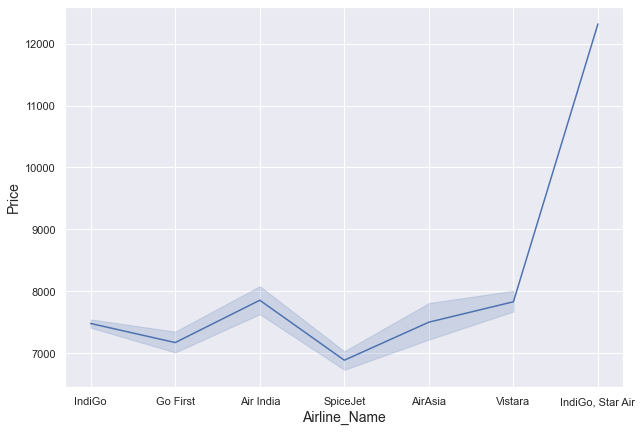

In [1672]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'Airline_Name',y= 'Price', data=df)
plt.xlabel('Airline_Name', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

# ```Observations```

 if we observe a ```first lineplot```, that is a relationship between ```Date_of_Journey```and ```Price``` then we can conclude that if we book any flight after 10- 15 days then prices go down as compare to immediate booking but prices go down on small decrement, we can see there is some large jump of price between immediate booking and  after 2 or 3 days but as we move further, we see there is some significant changes. if we see in ```second lineplot``` that is a relationship between ```Month_of_Journey```and ```Price``` as we move further from ```March``` to ```April```, price of flights drops linearly because this data is scarpe at the end of the march month that's why we see this drop curve. If we see ``` Third Lineplot``` prices are high at weekends and low at week days, so, it is clear that time to time prices are changes. So, by above observations, we can clearly say that best time to book a ticket is after 10-20 days on weekdays. if we see ```Last lineplot``` which is relationship of ```Price``` with ```Airline_Name``` then we can say ```spiceJet``` is cheaper than ```IndiGo```, ```GoFirst``` is also cheaper than ```IndiGo``` and ```IndiGo Star Air``` is expansive than others. Morning Flights are not expensive but it totally depends on the time of Booking. if we see in ``` Fourth Lineplot``` that is ```Departure_Time_hours``` with ```price``` then we can conclude here that afternoona dn evening flights are expansive than morning flights

# ```Removing Outliers```

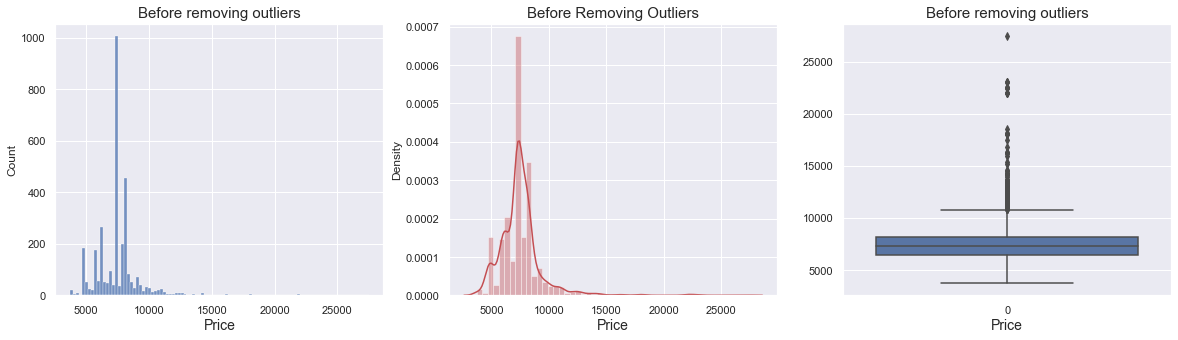

In [1673]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Price']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Price'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Price']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Price', fontsize= 14)
plt.show()

In [1674]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Price'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Price'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['Price'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)
for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
print("\n",'*'*50)

# lower side 
lower_side = df['Price'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))
print("\n",'*'*50)
for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
print("\n",'*'*50)

Inter quartile range:------> 1776.0

 **************************************************
Higher range:-
 (array([  89,  266,  739,  800, 1112, 1113, 1114, 1115, 1116, 1117, 1118,
       1119, 1120, 1121, 1167, 1213, 1235, 1258, 1259, 1282, 1304, 1325,
       1346, 1368, 1369, 1391, 1414, 1479, 1480, 1481, 1482, 1483, 1484,
       1509, 1542, 1562, 1563, 1564, 1582, 1583, 1622, 1623, 1624, 1625,
       1660, 1661, 1679, 1698, 1699, 1700, 1735, 1736, 1755, 1756, 1757,
       1812, 1828, 1829, 1846, 1847, 1864, 1865, 1866, 1867, 1868, 1894,
       1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       1949, 1974, 1986, 1987, 2000, 2013, 2027, 2043, 2084, 2097, 2112,
       2142, 2157, 2158, 2159, 2160, 2194, 2195, 2304, 2340, 2341, 2342,
       2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2420,
       2494, 2571, 2610, 2611, 2651, 2690, 2691, 2731, 2732, 2733, 2767,
       2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778,
       2779, 2780,

In [1675]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (3262, 18)
New Shape:------>  (3121, 18)


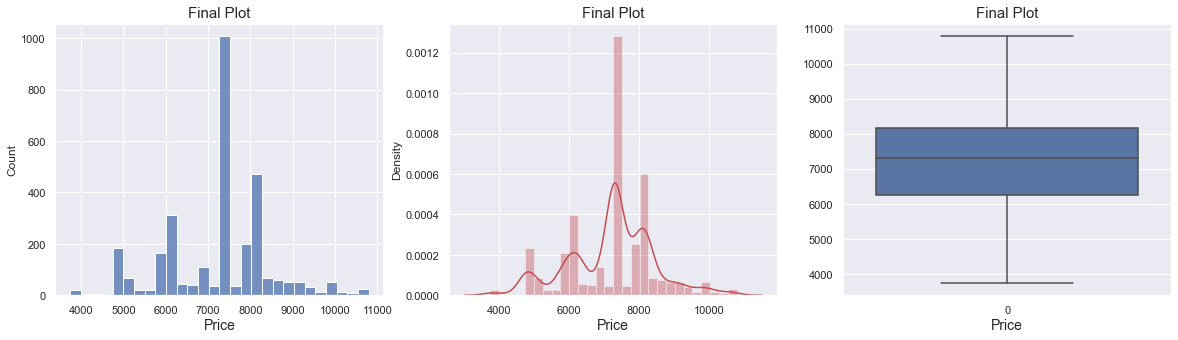

In [1676]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Price']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Price'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Price']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)
plt.show()

In [1677]:
df=df[df['Price']<10000].reset_index(drop=True)

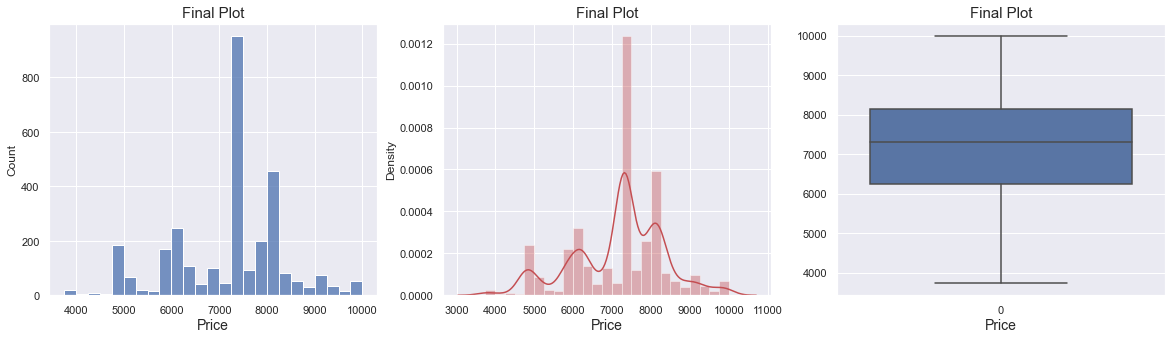

In [1679]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Price']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Price'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Price']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)
plt.show()

In [ ]:
#Drop the unncessary columns

In [1680]:
df.drop(columns='Duration', inplace = True)
time.sleep(2)
df.drop(columns='Departure_Time', inplace = True)
time.sleep(2)
df.drop(columns='Arrival_Time', inplace = True)
time.sleep(2)
df.drop(columns='Route', inplace = True)

In [1681]:
#check the desired shape of the dataset
df.shape

(3075, 14)

In [1684]:
#split x and y
x = df.drop(['Price'], axis=1)
y=df.Price

In [1685]:
#Initiate Label Encoder
lab_ene = LabelEncoder()

In [1686]:
#Using for loop to iterate all categorical columns
df_col=list(x)

for i in range(len(df_col)):
    df[df_col[i]] = LabelEncoder().fit_transform(df[df_col[i]])

In [1687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Airline_Name          3075 non-null   int32
 1   Date_of_Journey       3075 non-null   int32
 2   Source                3075 non-null   int32
 3   Destination           3075 non-null   int32
 4   Total_Stop            3075 non-null   int32
 5   Price                 3075 non-null   int64
 6   Day_of_Journey        3075 non-null   int32
 7   Month_of_Journey      3075 non-null   int32
 8   Departure_Time_hours  3075 non-null   int32
 9   Departure_Time_mins   3075 non-null   int32
 10  Arrival_Time_hours    3075 non-null   int32
 11  Arrival_Time_mins     3075 non-null   int32
 12  Duration_hours        3075 non-null   int32
 13  Duration_mins         3075 non-null   int32
dtypes: int32(13), int64(1)
memory usage: 180.3 KB


In [1688]:
df.head()

,Airline_Name,Date_of_Journey,Source,Destination,Total_Stop,Price,Day_of_Journey,Month_of_Journey,Departure_Time_hours,Departure_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_mins
0,3,8,3,4,2,7308,1,1,13,2,12,1,1,1
1,2,8,3,4,2,7308,1,1,13,4,12,2,1,2
2,0,8,3,4,2,7308,1,1,14,3,13,0,1,3
3,3,8,3,4,2,7308,1,1,15,7,14,5,1,2
4,2,8,3,4,2,7308,1,1,15,8,14,7,1,1


In [1689]:
#store clean file to csv
df.to_csv('cleaned_file_flight_price.csv')

In [1690]:
#shuffle
df = df.sample(df.shape[0])

correlation between the Features and with label:-----> (13, 13)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

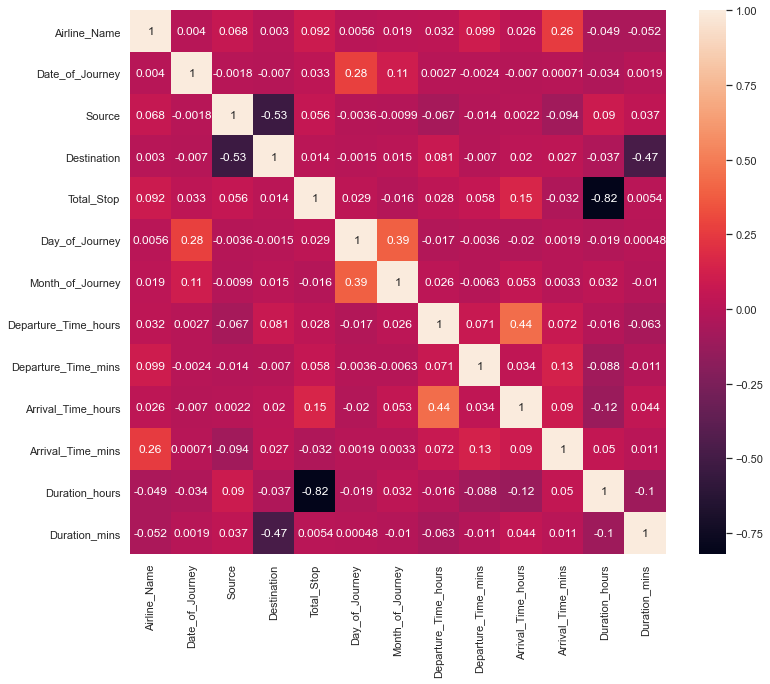

In [1725]:
# analyize the correlation
corr = x.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

In [1692]:
#split x and y
x = df.drop(['Price'], axis=1)
y=df.Price

In [1693]:
x.head()

,Airline_Name,Date_of_Journey,Source,Destination,Total_Stop,Day_of_Journey,Month_of_Journey,Departure_Time_hours,Departure_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_mins
1072,3,6,3,4,2,5,0,21,11,20,7,1,4
435,0,13,3,4,2,1,0,9,3,8,0,1,3
2162,5,0,4,0,2,0,0,10,10,9,1,1,9
1963,3,1,2,2,0,3,0,18,4,14,5,3,11
1062,3,6,3,4,2,5,0,17,2,15,11,1,3


In [1694]:
y.head()

1072    5838
435     7518
2162    8160
1963    8694
1062    5838
Name: Price, dtype: int64

In [1695]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 0.15782367, -0.54018233,  0.34433955, ...,  0.43893345,
        -0.09840283, -0.2524871 ],
       [-1.81497216,  0.71088552,  0.34433955, ..., -1.506309  ,
        -0.09840283, -0.53908652],
       [ 1.47302088, -1.61252619,  1.15077073, ..., -1.22841722,
        -0.09840283,  1.18051   ],
       ...,
       [-0.49977494, -1.07635426,  0.34433955, ..., -1.506309  ,
        -0.09840283, -1.11228535],
       [ 0.15782367,  0.8896095 ,  1.15077073, ...,  1.55050057,
        -0.09840283,  1.75370883],
       [-0.49977494, -0.00401039,  0.34433955, ..., -0.95052544,
        -0.09840283, -0.82568594]])

In [1696]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
 #no multicollinearity between the features

In [1697]:
vif.head(40)

,vif,features
0,1.101551,Airline_Name
1,1.083779,Date_of_Journey
2,1.630570,Source
3,1.975163,Destination
4,3.359714,Total_Stop
5,1.268471,Day_of_Journey
6,1.191814,Month_of_Journey
7,1.266820,Departure_Time_hours
8,1.038403,Departure_Time_mins
9,1.297830,Arrival_Time_hours


In [1698]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [1699]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #import library
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

```Check the Accuracy by using 5 models```

In [1700]:
#Model instantiating and training
lr = LinearRegression()
dtr=DecisionTreeRegressor()
rfo = RandomForestRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [1701]:
#train all the models
print('Linear Regression:----->',lr.fit(x_train, y_train))
time.sleep(2)
print('Decsion Tree:------->',dtr.fit(x_train, y_train))
time.sleep(2)
print('Random Forest:-------->',rfo.fit(x_train, y_train))
time.sleep(2)
print('Support vector machine:-------->',svr.fit(x_train, y_train))
time.sleep(2)
print('KNeighborsRegressor:-------->',knn.fit(x_train, y_train))

Linear Regression:-----> LinearRegression()
Decsion Tree:-------> DecisionTreeRegressor()
Random Forest:--------> RandomForestRegressor()
Support vector machine:--------> SVR()
KNeighborsRegressor:--------> KNeighborsRegressor()


In [1702]:
#Check How much our model learn
print('Linear regression Score:-------->', lr.score(x_train, y_train))
time.sleep(2)
print('Decision Tree score:------->', dtr.score(x_train,y_train))
time.sleep(2)
print('Random Forest score:------>',rfo.score(x_train, y_train))
time.sleep(2)
print('Support vector machine score:------>',svr.score(x_train, y_train))
time.sleep(2)
print('KNeighborsRegressor score:------>',knn.score(x_train, y_train))

Linear regression Score:--------> 0.3998066247393135
Decision Tree score:-------> 0.9942920308076825
Random Forest score:------> 0.9614925746543153
Support vector machine score:------> 0.029578323068666146
KNeighborsRegressor score:------> 0.6910292704958944


In [1703]:
#Let's check how well model fits the test data
print('Linear regression Score:-------->', lr.score(x_test, y_test))
time.sleep(2)
print('Decision Tree score:------->', dtr.score(x_test,y_test))
time.sleep(2)
print('Random Forest score:------>',rfo.score(x_test, y_test))
time.sleep(2)
print('Support vector machine score:------>',svr.score(x_test, y_test))
time.sleep(2)
print('KNeighborsRegressor score:------>',knn.score(x_test, y_test))

Linear regression Score:--------> 0.3315107514799117
Decision Tree score:-------> 0.6086166802727256
Random Forest score:------> 0.7259860339540465
Support vector machine score:------> 0.022144746853470565
KNeighborsRegressor score:------> 0.46290184196277717


In [1704]:
y_pred_lr = lr.predict(x_test)#save the predictions in some variables
y_pred_dtr = dtr.predict(x_test)
y_pred_rfo = rfo.predict(x_test)
y_pred_svr = svr.predict(x_test)
y_pred_knn = knn.predict(x_test)

In [1705]:
#Check the mean of all models cv score one by one
print("Linear regression CV Score:")
print(cross_val_score(lr,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dtr,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rfo,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svr,x_scaled,y,cv=5).mean())

Linear regression CV Score:
0.3708003145068156

 **************************************************
Decision Tree CV Score:
0.561512032221587

 **************************************************
Random Forest CV Score:
0.7542653467553254

 **************************************************
KNeighbour Classifier CV Score:
0.5117131567070897

 **************************************************
Support Vector Machine CV Score:
0.026144396420736606


Decision Tree:


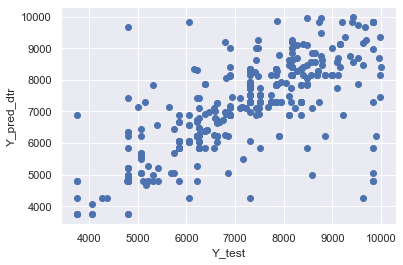

Random Forest:


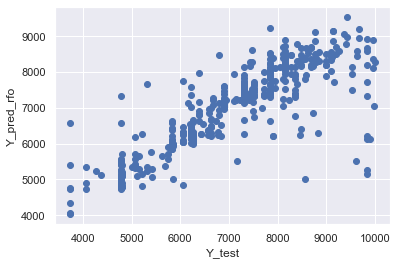

In [1726]:
#plot the actual and predicted value

print("Decision Tree:")
plt.scatter(y_test,y_pred_dtr)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_dtr')
plt.show()
time.sleep(2)
print("Random Forest:")
plt.scatter(y_test,y_pred_rfo)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_rfo')
plt.show()

In [1727]:
#calculate Mean absolute error

print("Decision Tree:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_dtr))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_dtr))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_dtr)))#calculate root mean square error

time.sleep(2)

print("Random Forest:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_rfo))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_rfo))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_rfo)))#calculate root mean square error

Decision Tree:
MAE:---------> 320.148244473342
MSE:-----------> 567699.9947984396
RSME:---------> 753.4586881829949
Random Forest:
MAE:---------> 300.99395557000435
MSE:-----------> 397456.20024732815
RSME:---------> 630.4412742257031


We see here, ```Support vector regressor```, ```KNN Regressor``` and ```Linear regression``` is giving us poor accuarcy, so, we can easily drop both them. If we see  ```Decision Tree Regressor``` and ```Random Forest Regressor```. both of them are giving us best training score and they giving us good accuarcy perhaps there is some overfitting exist that we will try to remove further. if we see, ```MAE, MSE, RSME``` score of both of them models, than we can conclude here that ```Random Forest Regressor``` is giving us less error than ```Decision Tree Regressor```

```Lasso regression```

In [1728]:
#import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [1729]:
#to find best alpha
lassocv= LassoCV(alphas=None, max_iter = 1000, normalize = True)

#train the model
print(lassocv.fit(x_train,y_train))
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
#best alpha parameter
alpha = lassocv.alpha_
print("Alpha value is:----->",alpha)
time.sleep(1)
print()
lasso_reg = Lasso(alpha) #fit the data
time.sleep(1)
print('*'*50)
time.sleep(1)
print(lasso_reg.fit(x_train,y_train)) #train the data
time.sleep(1)
print()
print('*'*50)
time.sleep(1)
print("Accuracy of the model is:---->", lasso_reg.score(x_test,y_test)) #get the score of test data

LassoCV(normalize=True)

**************************************************
Alpha value is:-----> 0.013191142641497912

**************************************************
Lasso(alpha=0.013191142641497912)

**************************************************
Accuracy of the model is:----> 0.3315114297721996


```Ridge Regression```

In [1710]:
ridgecv= RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize = True)
#train the data
print(ridgecv.fit(x_train,y_train))
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
#best alpha parameter
print("Alpha value is:----->",ridgecv.alpha_)
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
#fit the data
ridge_model = Ridge(alpha = ridgecv.alpha_)
print(ridge_model.fit(x_train,y_train))
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
print("Accuracy of the model is:----->",ridge_model.score(x_test,y_test)) #get the score

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

**************************************************
Alpha value is:-----> 0.020999999999999998

**************************************************
Ridge(alpha=0.020999999999999998)

**************************************************
Accuracy of the model is:-----> 0.33151086317674117


```Gridsearchcv by using Random Forest Regressor as a estimator```

In [1711]:
params = {'n_estimators':[10,20,30],
         'max_features':['auto',"sqrt","log2"],
         'min_samples_split':[10,11]}
gridsearch = GridSearchCV(estimator=rfo, param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params
rfc = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',rfc.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',rfc.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [10, 11],
                         'n_estimators': [10, 20, 30]})

 **************************************************
GridSearchCV best parameters:-----> {'max_features': 'auto', 'min_samples_split': 11, 'n_estimators': 30}

 **************************************************
Trained Model using best parameters:-----> RandomForestRegressor(min_samples_split=11, n_estimators=30)

 **************************************************
Accuracy score:------> 0.8753797041879952


```Using Ensembling Technique ```

Adaboost Regressor:--------> AdaBoostRegressor()

**************************************************
Adaboost Regressor Training Score:--------> 0.4891225820013917

**************************************************
Adaboost Regressor Testing Score:--------> 0.40236348892649476

 **************************************************
Ada Boost CV Score:
[0.39933854 0.41381877 0.4055669  0.44522793 0.42911119]

 **************************************************
Ada Boost CV Score:
0.4060560889832595

 **************************************************
Ada Booster:


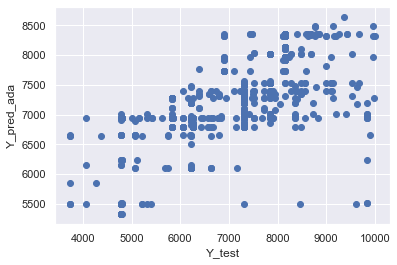

In [1712]:
ada = AdaBoostRegressor()
time.sleep(2)
print('Adaboost Regressor:-------->',ada.fit(x_train,y_train))
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
print('Adaboost Regressor Training Score:-------->',ada.score(x_train,y_train))
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
print('Adaboost Regressor Testing Score:-------->',ada.score(x_test,y_test))
time.sleep(2)
y_pred_ada = ada.predict(x_test)

time.sleep(2)
print("\n",'*'*50)

print("Ada Boost CV Score:")
print(cross_val_score(ada,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Ada Boost CV Score:")
print(cross_val_score(ada,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)
print("Ada Booster:")
plt.scatter(y_test,y_pred_ada)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_ada')
plt.show()

In [1713]:
print("Ada Booster:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_ada))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_ada))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_ada)))#calculate root mean square error

Ada Booster:
MAE:---------> 639.134411833529
MSE:-----------> 866869.4528530341
RSME:---------> 931.0582435342238


```XGBoost Regressor```

XGBoost Training score:------> XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
**************************************************
XGBoost Testing Score:-------> 0.7197832747537083

 **************************************************
XGBoost CV Score:
[0.70585563 0.79978771 0.76872448 0.77711978 0.72257445]

 **************************************************
XGBoost CV Score:
0.754812410448275

 ********************

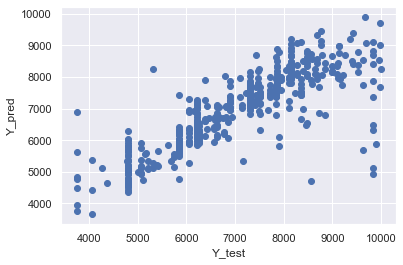

In [1714]:
xgbr = xgb.XGBRegressor()
time.sleep(1)
print("XGBoost Training score:------>",xgbr.fit(x_train,y_train))
time.sleep(1)
print('*'*50)
time.sleep(1)
y_pred = xgbr.predict(x_test)
print("XGBoost Testing Score:------->", r2_score(y_test, y_pred))

time.sleep(2)
print("\n",'*'*50)

print("XGBoost CV Score:")
print(cross_val_score(xgbr,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("XGBoost CV Score:")
print(cross_val_score(xgbr,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)
print("XGBooster:")
plt.scatter(y_test,y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [1715]:
print("XGBoost:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred)))#calculate root mean square error

XGBoost:
MAE:---------> 333.20276244006016
MSE:-----------> 406453.278529105
RSME:---------> 637.53688405386


```GridSearchCV By using XGBR as a estimator```

In [1740]:
start_time = time.time()
params = {
    'max_depth':range(4,12,2),
    'learning_rate':np.arange(0.1,1,0.1),
    'min_samples_split': range(4,8,2),
    'nthread':[4],
    'objective':['reg:linear'],
    'learning_rate': [.03, 0.05, .07], #so called `eta` value
    'max_depth': [5, 6, 7],
    'min_child_weight': [4],
    'silent': [1],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'n_estimators': [500]}

gridsearch = GridSearchCV(estimator=xgbr, param_grid= params, cv=2,n_jobs = 5,
                        verbose=True )#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params
xgbr_1 = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',xgbr_1.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',xgbr_1.score(x_train,y_train))#check the accuracy score
print("\n",'*'*50)
end_time = time.time()
T = (end_time - start_time)/60
print("Total time taken (in mins):------>", T )

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[16:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                 

```GradientBoostingRegressor```

GradientBoostingRegressor Training Score:-----> GradientBoostingRegressor(learning_rate=0.4, n_estimators=6)
**************************************************
GradientBoostingRegressor Testing score:------> 0.5706009089178948

 **************************************************
GBR CV Score:
[0.55756646 0.62602796 0.6179395  0.60632713 0.53155697]

 **************************************************
GBR CV Score:
0.5878836028534188

 **************************************************
GBR:


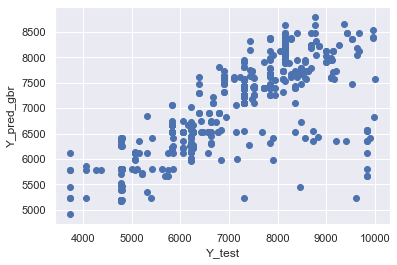

In [1716]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=6, learning_rate=.4)
time.sleep(1)
print("GradientBoostingRegressor Training Score:----->", gbr.fit(x_train,y_train))
time.sleep(1)
print("*"*50)
time.sleep(1)
y_pred_gbr = gbr.predict(x_test)
print("GradientBoostingRegressor Testing score:------>", r2_score(y_test,y_pred_gbr))
time.sleep(2)
print("\n",'*'*50)

print("GBR CV Score:")
print(cross_val_score(gbr,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("GBR CV Score:")
print(cross_val_score(gbr,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)
print("GBR:")
plt.scatter(y_test,y_pred_gbr)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_gbr')
plt.show()

In [1717]:
print("GBR:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_gbr))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_gbr))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_gbr)))#calculate root mean square error

GBR:
MAE:---------> 470.3489098311411
MSE:-----------> 622841.7244343235
RSME:---------> 789.2032212518671


In [1718]:
with open('flight_price_prediction','wb') as f:
     pickle.dump(xgbr_1,f)

In [1719]:
df.head(5)

,Airline_Name,Date_of_Journey,Source,Destination,Total_Stop,Price,Day_of_Journey,Month_of_Journey,Departure_Time_hours,Departure_Time_mins,Arrival_Time_hours,Arrival_Time_mins,Duration_hours,Duration_mins
1072,3,6,3,4,2,5838,5,0,21,11,20,7,1,4
435,0,13,3,4,2,7518,1,0,9,3,8,0,1,3
2162,5,0,4,0,2,8160,0,0,10,10,9,1,1,9
1963,3,1,2,2,0,8694,3,0,18,4,14,5,3,11
1062,3,6,3,4,2,5838,5,0,17,2,15,11,1,3
